In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Function to load the dataset from a URL
def load_dataset(url):
    return pd.read_csv(url)

In [3]:
# Function to visualize the distribution of a feature
def plot_data_distribution(data, feature):
    plt.figure(figsize=(10, 6))
    plt.hist(data[feature], bins=50, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [4]:
# Load the dataset
diabetes_df = load_dataset('https://raw.githubusercontent.com/raccamateo/NEC_A2/main/diabetes_original.csv')

In [5]:
# Data exploration
print(diabetes_df.head())
print(diabetes_df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

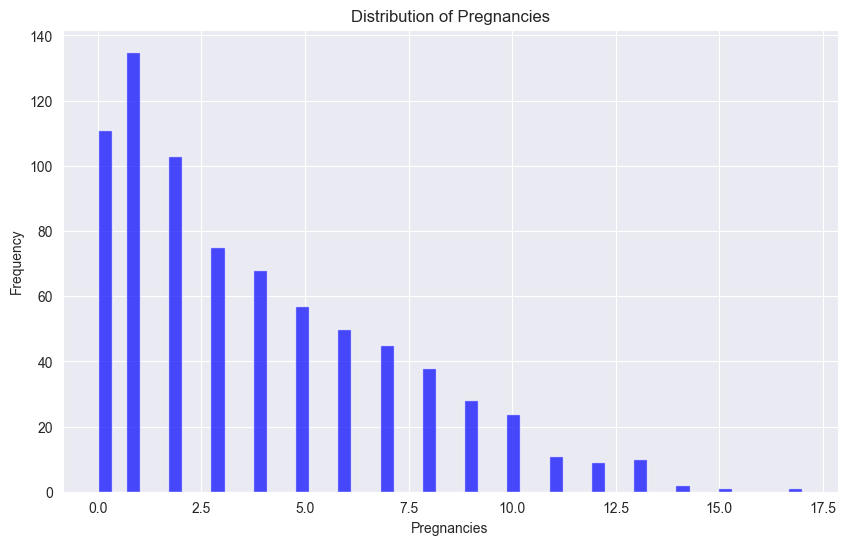

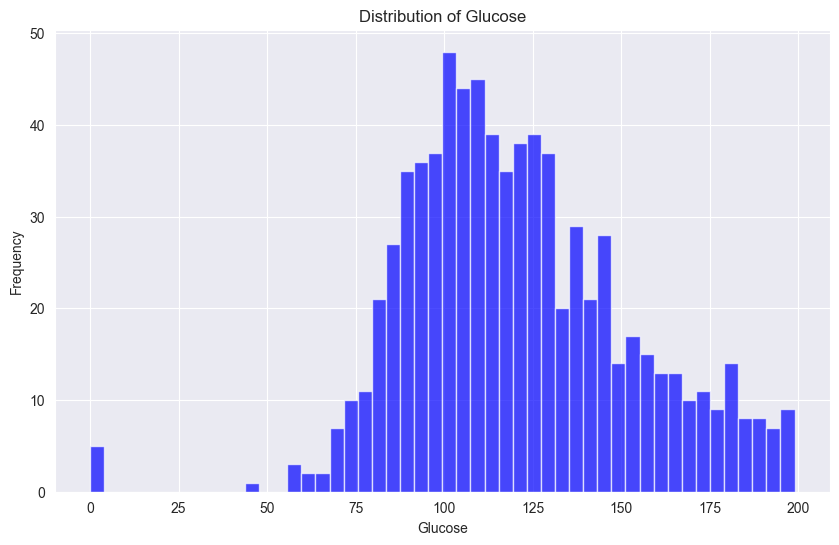

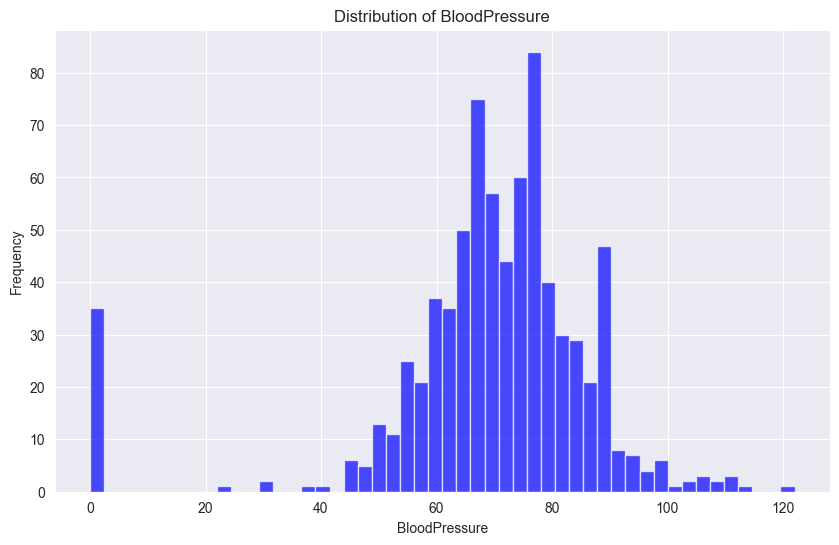

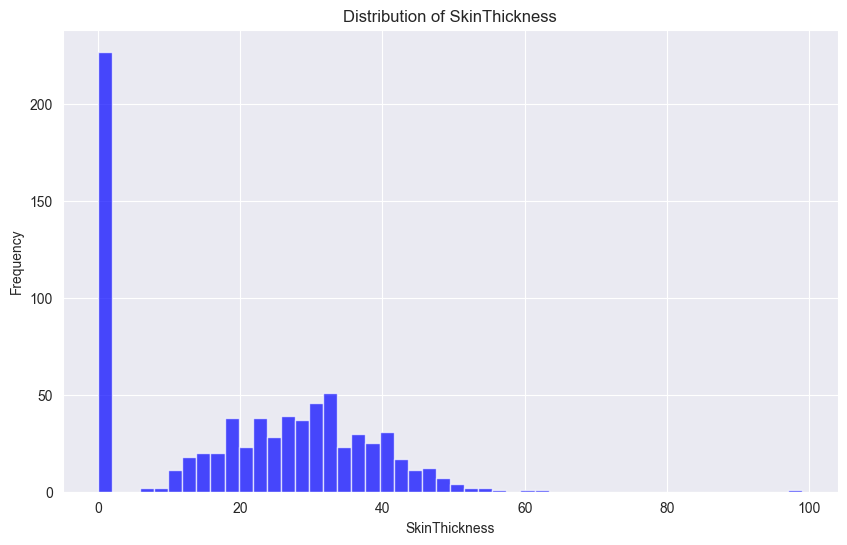

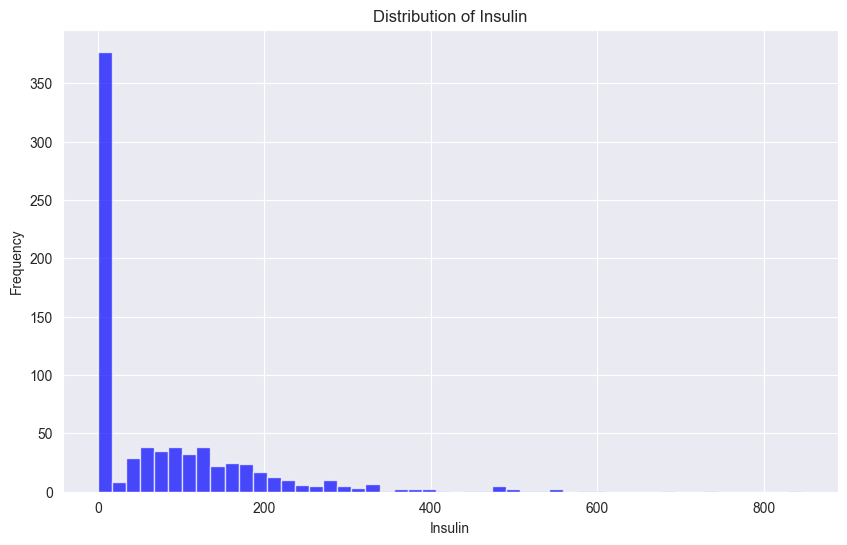

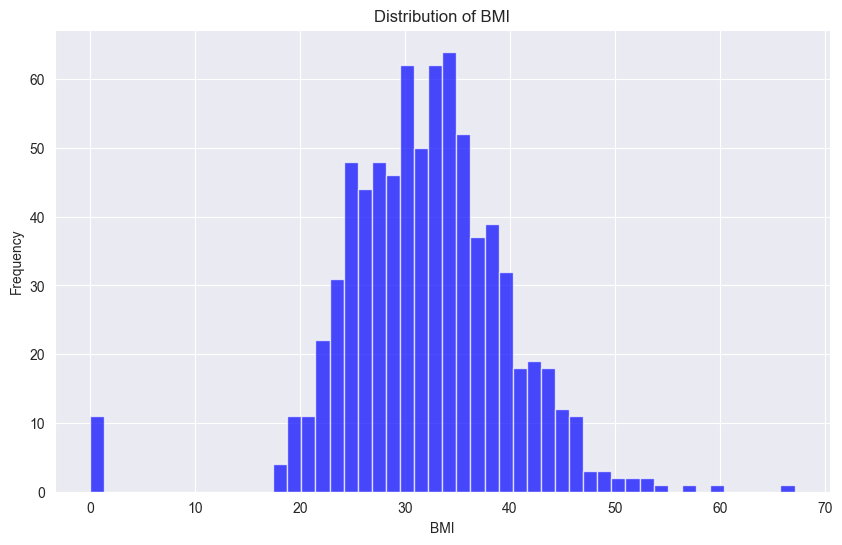

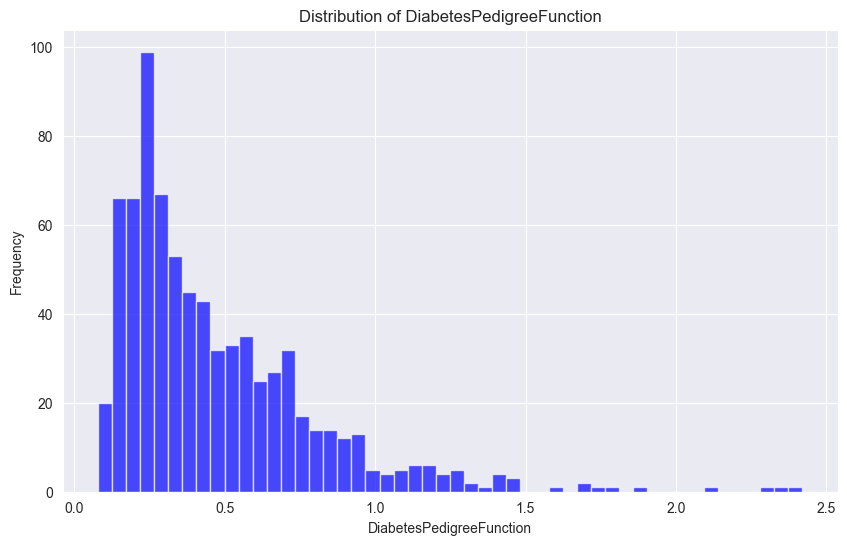

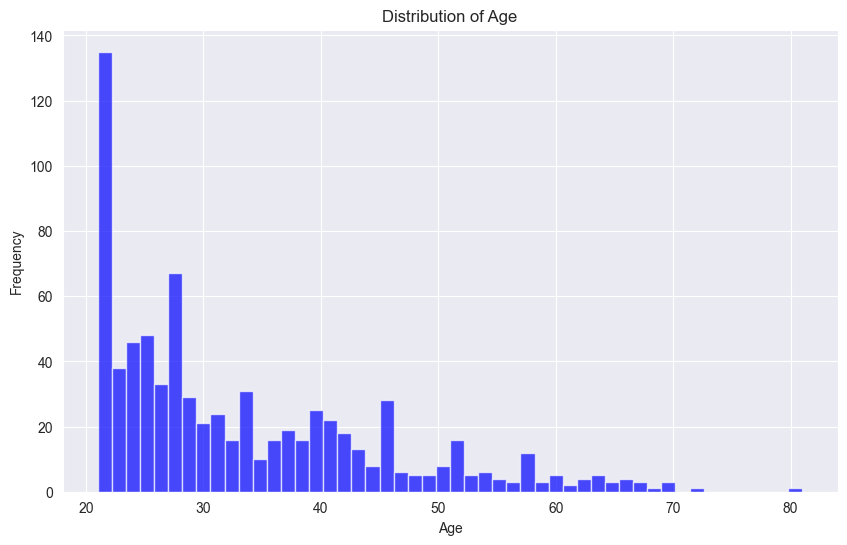

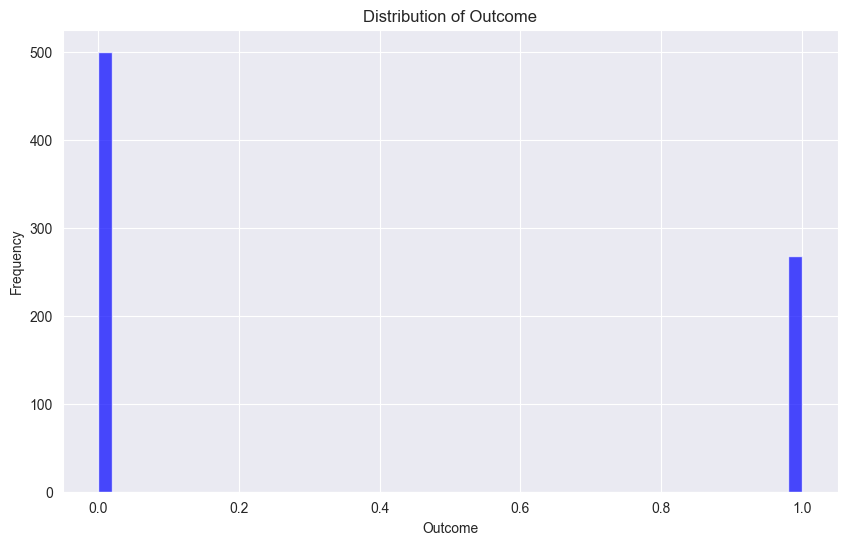

In [6]:
# Visualize the distribution of each numerical feature in the dataset
numerical_features = diabetes_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in numerical_features:
    plot_data_distribution(diabetes_df, feature)

In [7]:
# Shuffle the data to remove any inherent sorting
diabetes_df_shuffled = diabetes_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
# Split the data into training/validation (80%) and testing (20%) sets
train_val_df, test_df = train_test_split(diabetes_df_shuffled, test_size=0.2, random_state=42)

In [9]:
# Identify features and target column
# Assuming the last column is the target for classification
features = train_val_df.columns[:-1]
target = train_val_df.columns[-1]

In [10]:
# Normalize the numerical features using StandardScaler
scaler = StandardScaler()
train_val_df[features] = scaler.fit_transform(train_val_df[features])
test_df[features] = scaler.transform(test_df[features])

In [ ]:
# Save the preprocessed data
train_val_df.to_csv('diabetes_train_val.csv', index=False)
test_df.to_csv('diabetes_test.csv', index=False)